In [50]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [51]:
import numpy as np 
import sklearn 
from sklearn import metrics 
from sklearn.datasets import load_iris
import pandas as pd 
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingClassifier
import matplotlib.pyplot as plt 

In [52]:
iris = load_iris()
iris_df = data1 = pd.DataFrame(data= np.c_[iris['data'], iris['target']],
                     columns= iris['feature_names'] + ['target'])
iris_df.sample(10)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
78,6.0,2.9,4.5,1.5,1.0
68,6.2,2.2,4.5,1.5,1.0
35,5.0,3.2,1.2,0.2,0.0
54,6.5,2.8,4.6,1.5,1.0
105,7.6,3.0,6.6,2.1,2.0
92,5.8,2.6,4.0,1.2,1.0
42,4.4,3.2,1.3,0.2,0.0
94,5.6,2.7,4.2,1.3,1.0
79,5.7,2.6,3.5,1.0,1.0
39,5.1,3.4,1.5,0.2,0.0


In [53]:
X = iris_df.drop(['target'], axis=1)
Y = iris_df['target']
feature_names = iris_df.columns.values.tolist()[:-1]
class_names = Y.unique().tolist()
print(feature_names)
print(class_names)

['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
[0.0, 1.0, 2.0]


In [54]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, shuffle=True)
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((120, 4), (30, 4), (120,), (30,))

In [55]:
def single_y_test_pred(y_test, y_pred) -> pd.DataFrame:
    return pd.concat(
        [y_test.reset_index(), pd.DataFrame({"y_pred": y_pred})], axis=1
    )

In [56]:
ada = sklearn.ensemble.AdaBoostClassifier()
print(ada) 
ada = ada.fit(x_train, y_train)
y_pred = ada.predict(x_test)

# print(single_y_test_pred(y_test, y_pred))

print(sklearn.metrics.classification_report(y_test, y_pred))

print("Confusion matrix:")
print(sklearn.metrics.confusion_matrix(y_test, y_pred, labels=class_names))

accuracy_test = metrics.accuracy_score(y_test, y_pred) * 100
accuracy_train = metrics.accuracy_score(y_train, ada.predict(x_train)) * 100

print(f"Accuracy: {round(accuracy_test, 2)}% on Test Data")
print(f"Accuracy: {round(accuracy_train, 2)}% on Training Data")

print(ada.score(x_test, y_test))

feature_imp_ada = pd.Series(ada.feature_importances_, index=feature_names)
print(feature_imp_ada)

AdaBoostClassifier()
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00        10
         1.0       0.73      1.00      0.84         8
         2.0       1.00      0.75      0.86        12

    accuracy                           0.90        30
   macro avg       0.91      0.92      0.90        30
weighted avg       0.93      0.90      0.90        30

Confusion matrix:
[[10  0  0]
 [ 0  8  0]
 [ 0  3  9]]
Accuracy: 90.0% on Test Data
Accuracy: 97.5% on Training Data
0.9
sepal length (cm)    0.0
sepal width (cm)     0.0
petal length (cm)    0.5
petal width (cm)     0.5
dtype: float64


In [57]:
gb = GradientBoostingClassifier()
print(gb) 
gb = gb.fit(x_train, y_train)
y_pred = gb.predict(x_test)

# print(single_y_test_pred(y_test, y_pred))

print(sklearn.metrics.classification_report(y_test, y_pred))

print("Confusion matrix:")
print(sklearn.metrics.confusion_matrix(y_test, y_pred, labels=class_names))

accuracy_test = metrics.accuracy_score(y_test, y_pred) * 100
accuracy_train = metrics.accuracy_score(y_train, gb.predict(x_train)) * 100

print(f"Accuracy: {round(accuracy_test, 2)}% on Test Data")
print(f"Accuracy: {round(accuracy_train, 2)}% on Training Data")

print(gb.score(x_test, y_test))

feature_imp_gb = pd.Series(gb.feature_importances_, index=feature_names)
print(feature_imp_gb)

GradientBoostingClassifier()
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00        10
         1.0       0.73      1.00      0.84         8
         2.0       1.00      0.75      0.86        12

    accuracy                           0.90        30
   macro avg       0.91      0.92      0.90        30
weighted avg       0.93      0.90      0.90        30

Confusion matrix:
[[10  0  0]
 [ 0  8  0]
 [ 0  3  9]]
Accuracy: 90.0% on Test Data
Accuracy: 100.0% on Training Data
0.9
sepal length (cm)    0.016096
sepal width (cm)     0.105331
petal length (cm)    0.221805
petal width (cm)     0.656767
dtype: float64


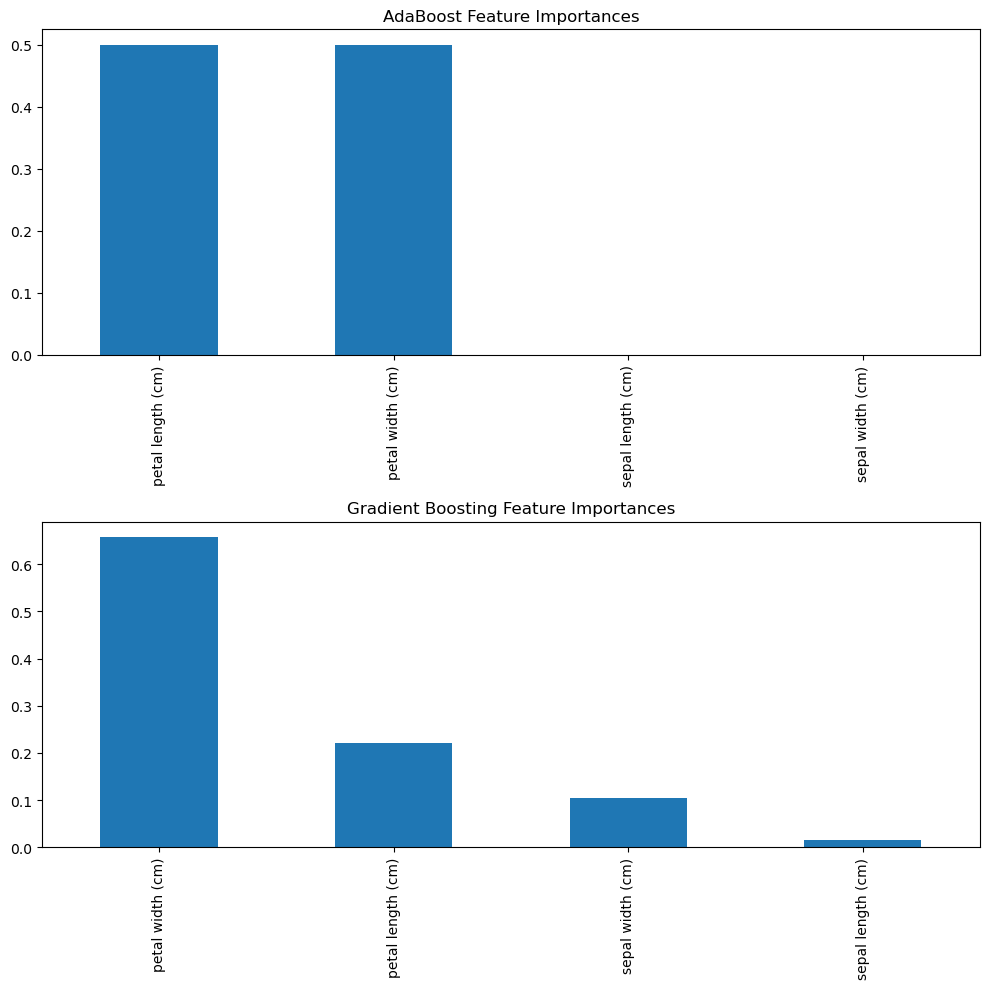

c:\Users\OMEN\anaconda3\envs\ml\lib\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but AdaBoostClassifier was fitted with feature names
  warnings.warn(


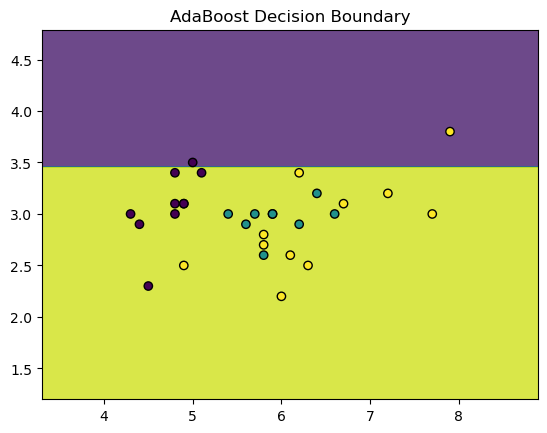

c:\Users\OMEN\anaconda3\envs\ml\lib\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but GradientBoostingClassifier was fitted with feature names
  warnings.warn(


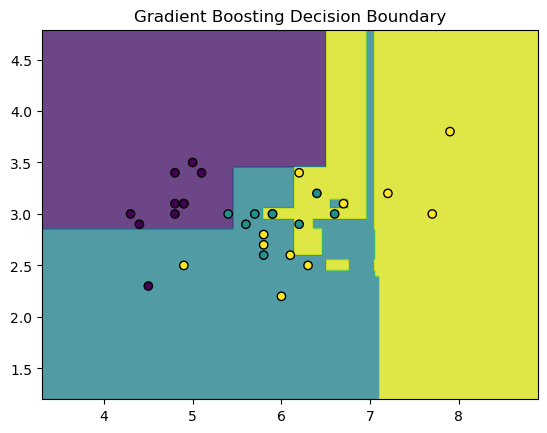

In [58]:
# Visualize Feature Importances
fig, axs = plt.subplots(2, 1, figsize=(10, 10))
feature_imp_ada.sort_values(ascending=False).plot(kind='bar', ax=axs[0], title='AdaBoost Feature Importances')
feature_imp_gb.sort_values(ascending=False).plot(kind='bar', ax=axs[1], title='Gradient Boosting Feature Importances')
plt.tight_layout()
plt.show()

# Visualize Decision Boundaries

def plot_decision_boundaries(X, y, model, title):
    x_min, x_max = X.iloc[:, 0].min() - 1, X.iloc[:, 0].max() + 1
    y_min, y_max = X.iloc[:, 1].min() - 1, X.iloc[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01),
                         np.arange(y_min, y_max, 0.01))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, alpha=0.8)
    plt.scatter(X.iloc[:, 0], X.iloc[:, 1], c=y, edgecolor='k', marker='o')
    plt.title(title)
    plt.show()

# 2 features
X_vis_train = x_train.iloc[:, :2]
X_vis_test = x_test.iloc[:, :2]

# Train models with only the first two features for visualization
ada_vis = sklearn.ensemble.AdaBoostClassifier()
ada_vis.fit(X_vis_train, y_train)
gb_vis = GradientBoostingClassifier()
gb_vis.fit(X_vis_train, y_train)

plot_decision_boundaries(X_vis_test, y_test, ada_vis, "AdaBoost Decision Boundary")
plot_decision_boundaries(X_vis_test, y_test, gb_vis, "Gradient Boosting Decision Boundary")